<a href="https://colab.research.google.com/github/Rishekh/Airbnb-Booking-Analysis/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?
* How long ago the last review was left?
* How often the host replies to inquiries?
* Mean rating of reviews given by guests? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/project/Airbnb.csv"
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/Airbnb.csv")

**Lets look at the first few rows of the dataframe**

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Lets take a look at the last few rows of data set**

In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**Number of rows and columns in the dataframe:**

In [ ]:
df.shape

(48895, 16)

**types of variables present in the dataframe:**

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**list of columns in the dataframe:**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Statistical Analysis of dataframe:**

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Descriptive Analysis of the dataframe. Checking for the null rate, fill rate and null values if any present in the dataframe df.**

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**replacing the null values of  column with the some value**

In [ ]:
df.fillna(value={'name':'no name','host_name':'no host name','last_review':'no review'},inplace=True)

In [ ]:
mean_value = df['reviews_per_month'].mean()
mean_value
df['reviews_per_month'].fillna(value=mean_value,inplace=True)

In [ ]:
df['reviews_per_month']

0        0.210000
1        0.380000
2        1.373221
3        4.640000
4        0.100000
           ...   
48890    1.373221
48891    1.373221
48892    1.373221
48893    1.373221
48894    1.373221
Name: reviews_per_month, Length: 48895, dtype: float64

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**finding the percentage of null values present in the data set**

In [ ]:
percent_miss = df.isnull().sum()*100/len(df)
percent_miss

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

End of data cleaning.
Now the data is cleaned and the data set is ready to export

In [ ]:
df.to_csv("cleaned_df.csv")

**Now divide the dataset into 2 parts.**

*   Categorial column
*   Numerical column

We can easily differentiate dataset between categorial and numerical data set.

**group the columns with object type as categorial and numerical columns:**

In [ ]:
categorial_columns = [x for x in df.columns if df[x].dtype=="O"]
categorial_columns

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [ ]:
numerical_columns = [x for x in df.columns if df[x].dtype!="O"]
numerical_columns

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
numerical_data = df[numerical_columns]

**Which host has the maximum number of entries in the data set?**

In [ ]:
different_hosts = df['host_name'].value_counts()
top_different_hosts = different_hosts.head(10)
top_different_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [ ]:
max_hosts = df['host_name'].value_counts().max()
max_hosts

417

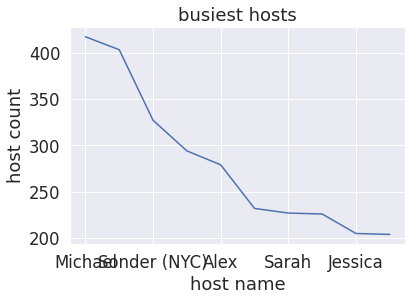

In [ ]:
top_different_hosts.plot(kind='line')

plt.title('busiest hosts')
plt.ylabel('host count')
plt.xlabel('host name')
plt.rcParams['figure.figsize']=(20,3)

**Calculated host listings count vs host name.**



In [ ]:
listing_count = df[['host_name','calculated_host_listings_count']].value_counts()
host_listing_count = listing_count.head(15)
host_listing_count

#listing_count = df.groupby(['calculated_ho,as_index=False).agg({"calculated_host_listings_count": "count"}).rename(columns ={'calculated_host_listings_count':'total'}

host_name     calculated_host_listings_count
Sonder (NYC)  327                               327
Michael       1                                 294
David         1                                 280
Blueground    232                               232
Alex          1                                 199
Daniel        1                                 194
Sarah         1                                 178
John          1                                 156
Chris         1                                 145
Andrew        1                                 143
Maria         1                                 133
Anna          1                                 133
Jessica       1                                 131
Jennifer      1                                 127
Kara          121                               121
dtype: int64

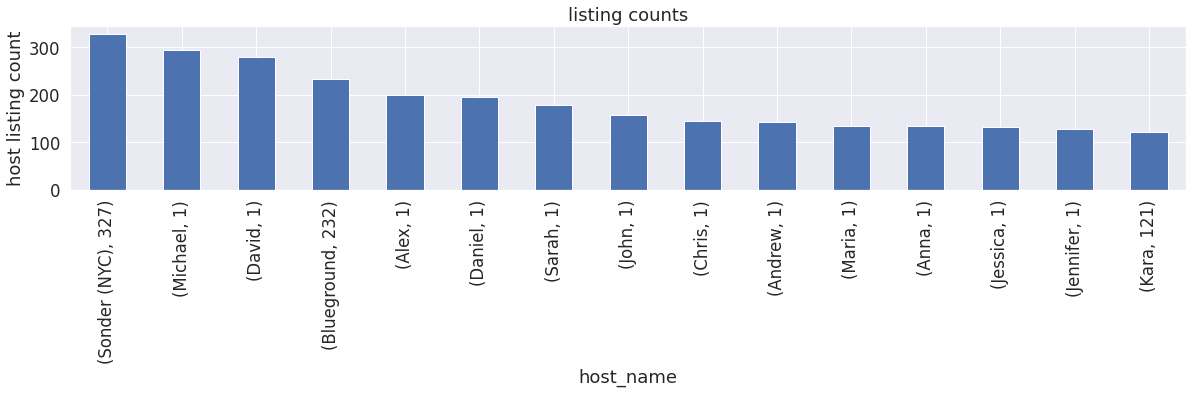

In [ ]:
host_listing_count.plot(kind='bar')

plt.title('listing counts')
plt.xlabel('host_name')
plt.ylabel('host listing count')
plt.rcParams['figure.figsize']=(20,2)

**Different types of rooms available:**

In [ ]:
list(df['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
type_of_room = df['room_type'].value_counts()
type_of_room

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

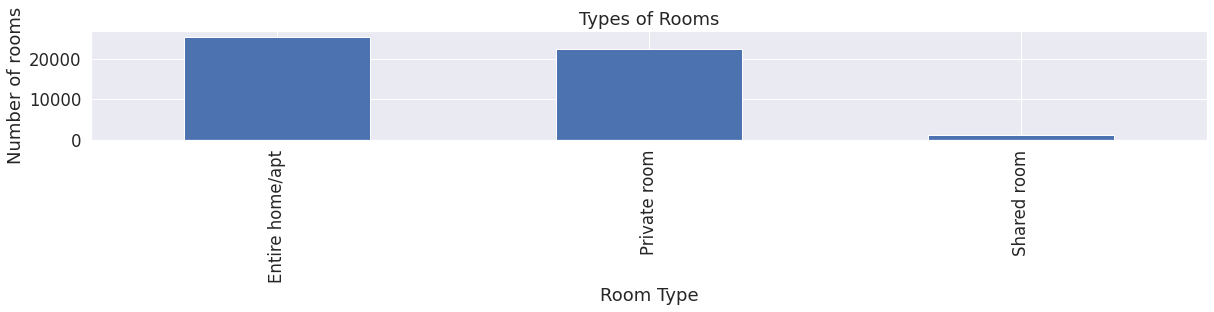

In [ ]:
type_of_room.plot(kind='bar')

plt.title('Types of Rooms')
plt.xlabel('Room Type')
plt.ylabel('Number of rooms')
plt.rcParams['figure.figsize']=(30,5)

In [ ]:
df['price'].head(100)

0     149
1     225
2     150
3      89
4      80
     ... 
95    105
96    140
97     89
98     98
99    125
Name: price, Length: 100, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


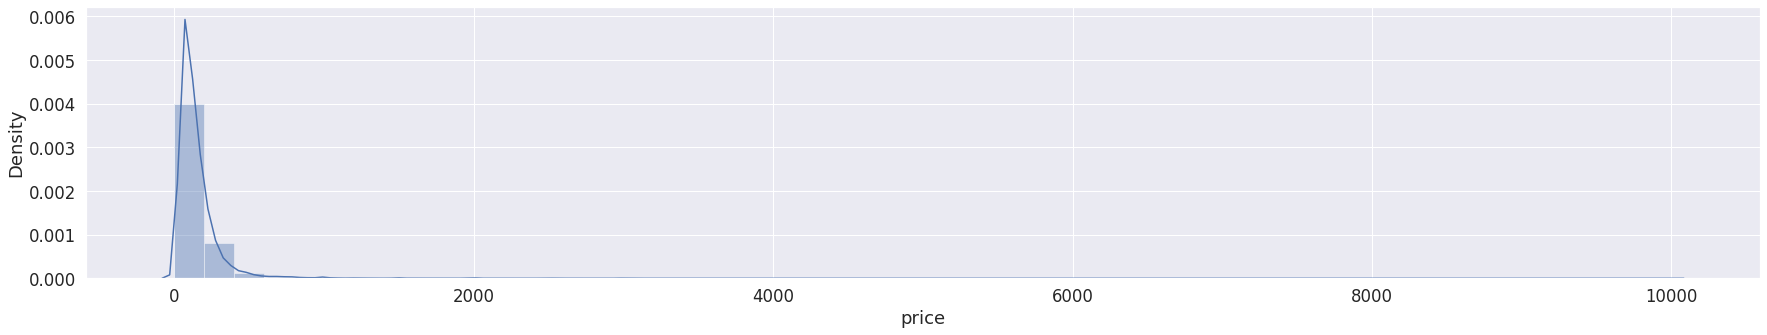

In [ ]:
#histogram
sns.distplot(df['price']);

IQR:

In [ ]:
Q1 = np.percentile(df['price'],25,interpolation='midpoint')
Q3 = np.percentile(df['price'],75,interpolation='midpoint')
IQR = Q3-Q1
IQR

106.0

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


**Price variation based on the room type using scatter plot**

 In the scatter plot below, 

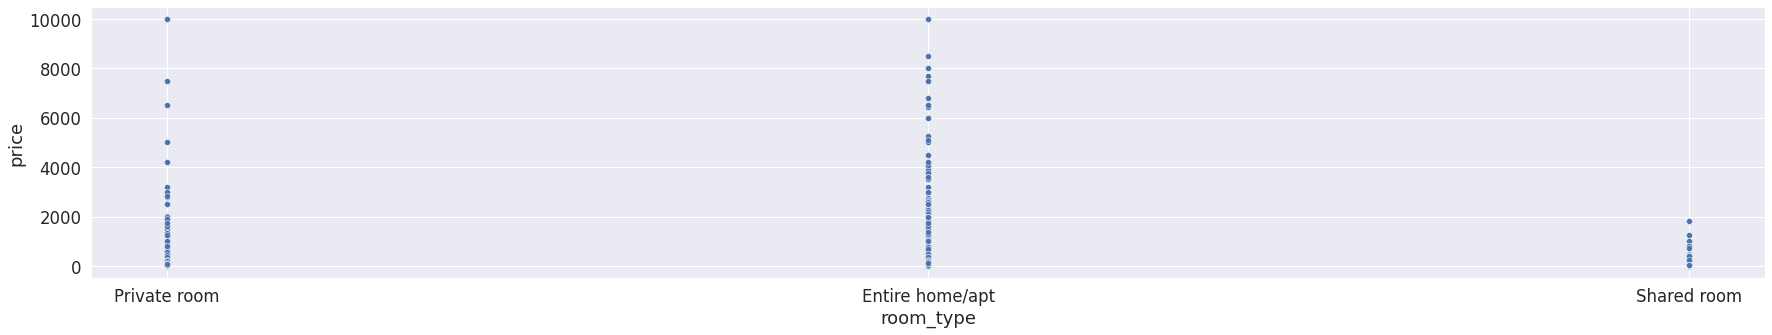

In [ ]:
sns.scatterplot(x=df['room_type'],y=df['price'])

**Handling outliers in price column**

In this section, we will use the seaborn library to create a boxplot for the price of rooms

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


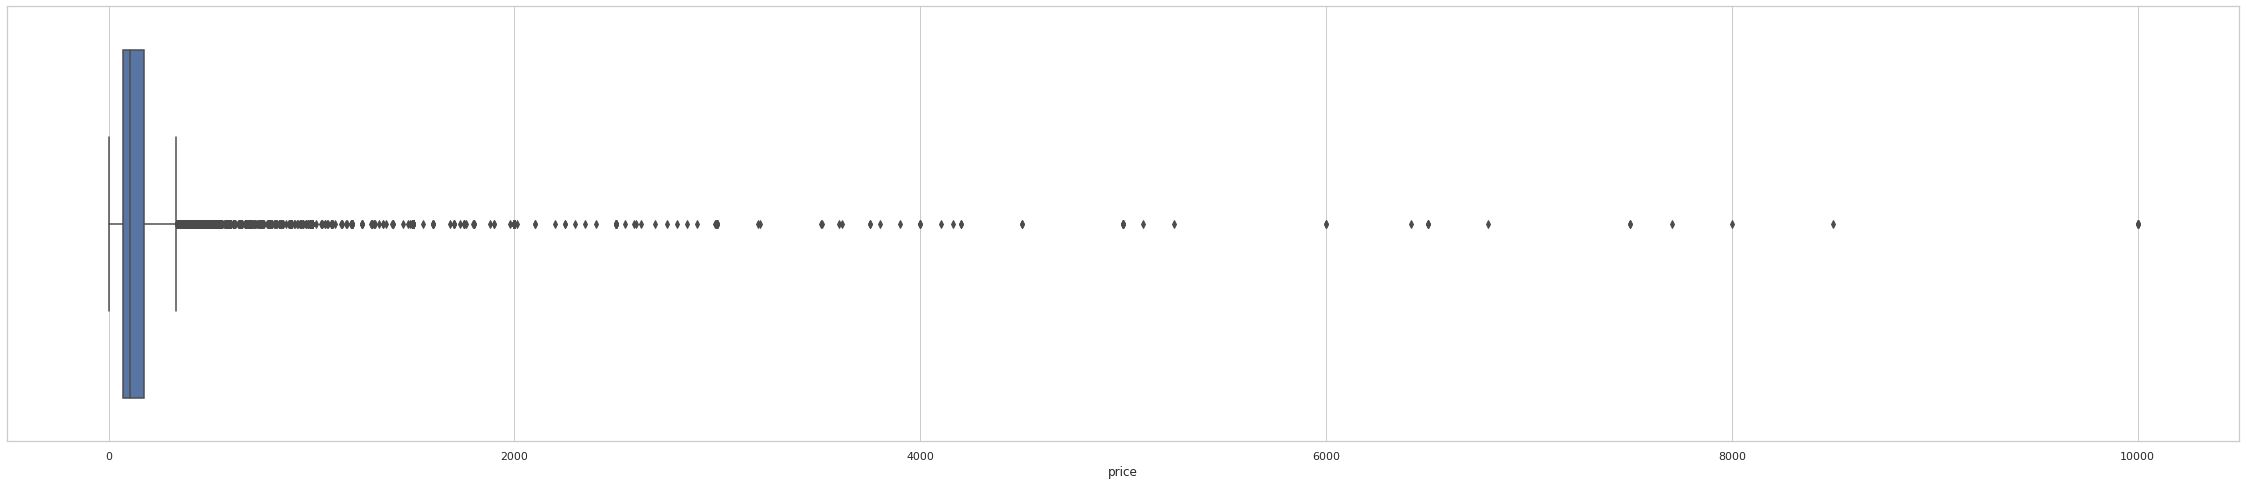

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(40,8))
ax = sns.boxplot(x='price',data=df ,orient="v")

Distribution plot for price and minimum nights column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


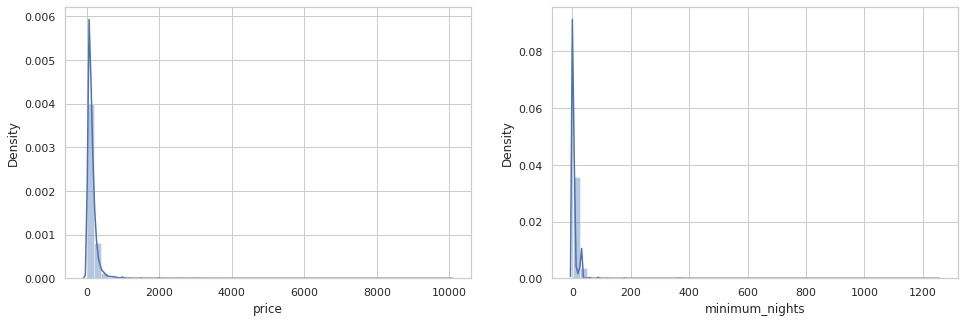

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.distplot(df['minimum_nights'])
plt.show()

IQR based filtering. It is used when the data distribution is skewed.

**Finding the IQR:**

In [ ]:
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)

Finding the upper and lower limit.

In [ ]:
upper_limit = percentile75+1.5*IQR
lower_limit = percentile25-1.5*IQR
print(upper_limit)
print(lower_limit)

334.0
-90.0


Finding Outliers

In [ ]:
df[df['price']>upper_limit]
df[df['price']<lower_limit]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Trimming

In [ ]:
new_df = df[df['price']<upper_limit]
new_df.shape

(45918, 16)

**Compare the plots before and after trimming of outliers in price column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

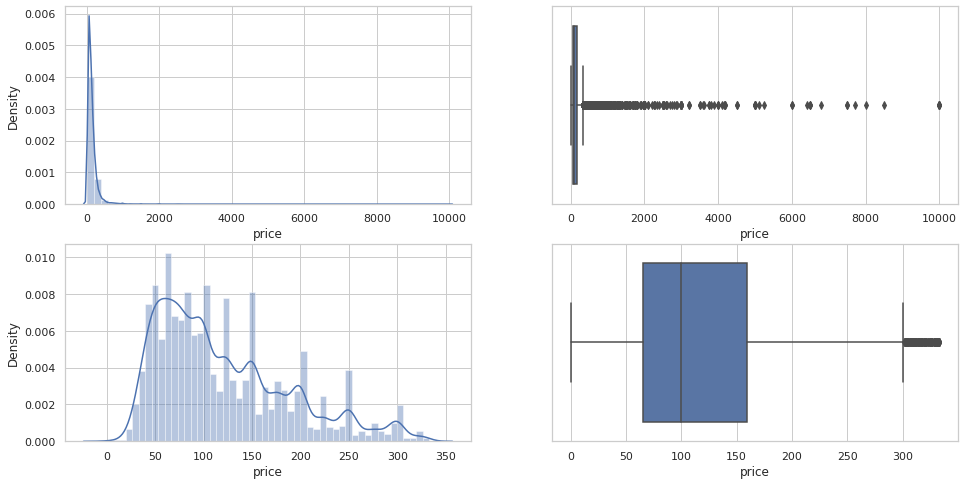

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.subplot(2,2,3)
sns.distplot(new_df['price'])
plt.subplot(2,2,4)
sns.boxplot(new_df['price'])
plt.show()

**We can provide box plot for each type of room. To do so we just need to add another parameter, 'y' in seaborn boxplot() method.**

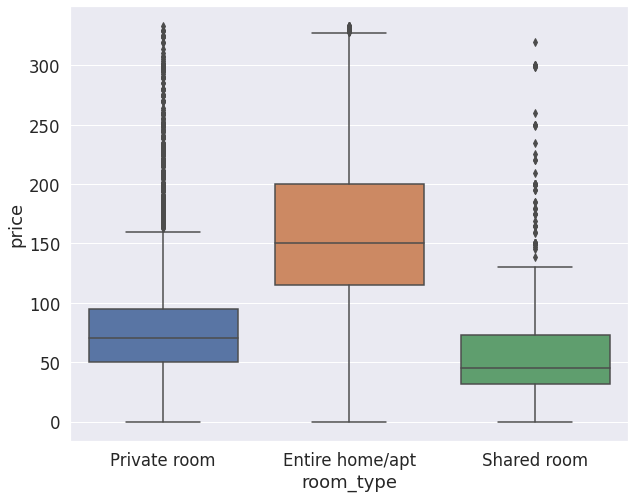

In [ ]:
sns.set(style='whitegrid')
#plt.figure(figsize=(7.50,2.50))
sns.set(rc={'figure.figsize':(10,8)},font_scale=1.5)
ax = sns.boxplot(y='price',x='room_type',data=new_df ,orient="v")




**Finding the average of review per month and visualising it with room type:**

In [ ]:
room_review_per_month_mean = df.groupby('room_type')['reviews_per_month'].mean().sort_values(ascending=True)
#room_review_per_month_mean = df.groupby('room_type')['reviews_per_month'].count()
room_review_per_month_mean

room_type
Entire home/apt    1.319894
Private room       1.430180
Shared room        1.445062
Name: reviews_per_month, dtype: float64

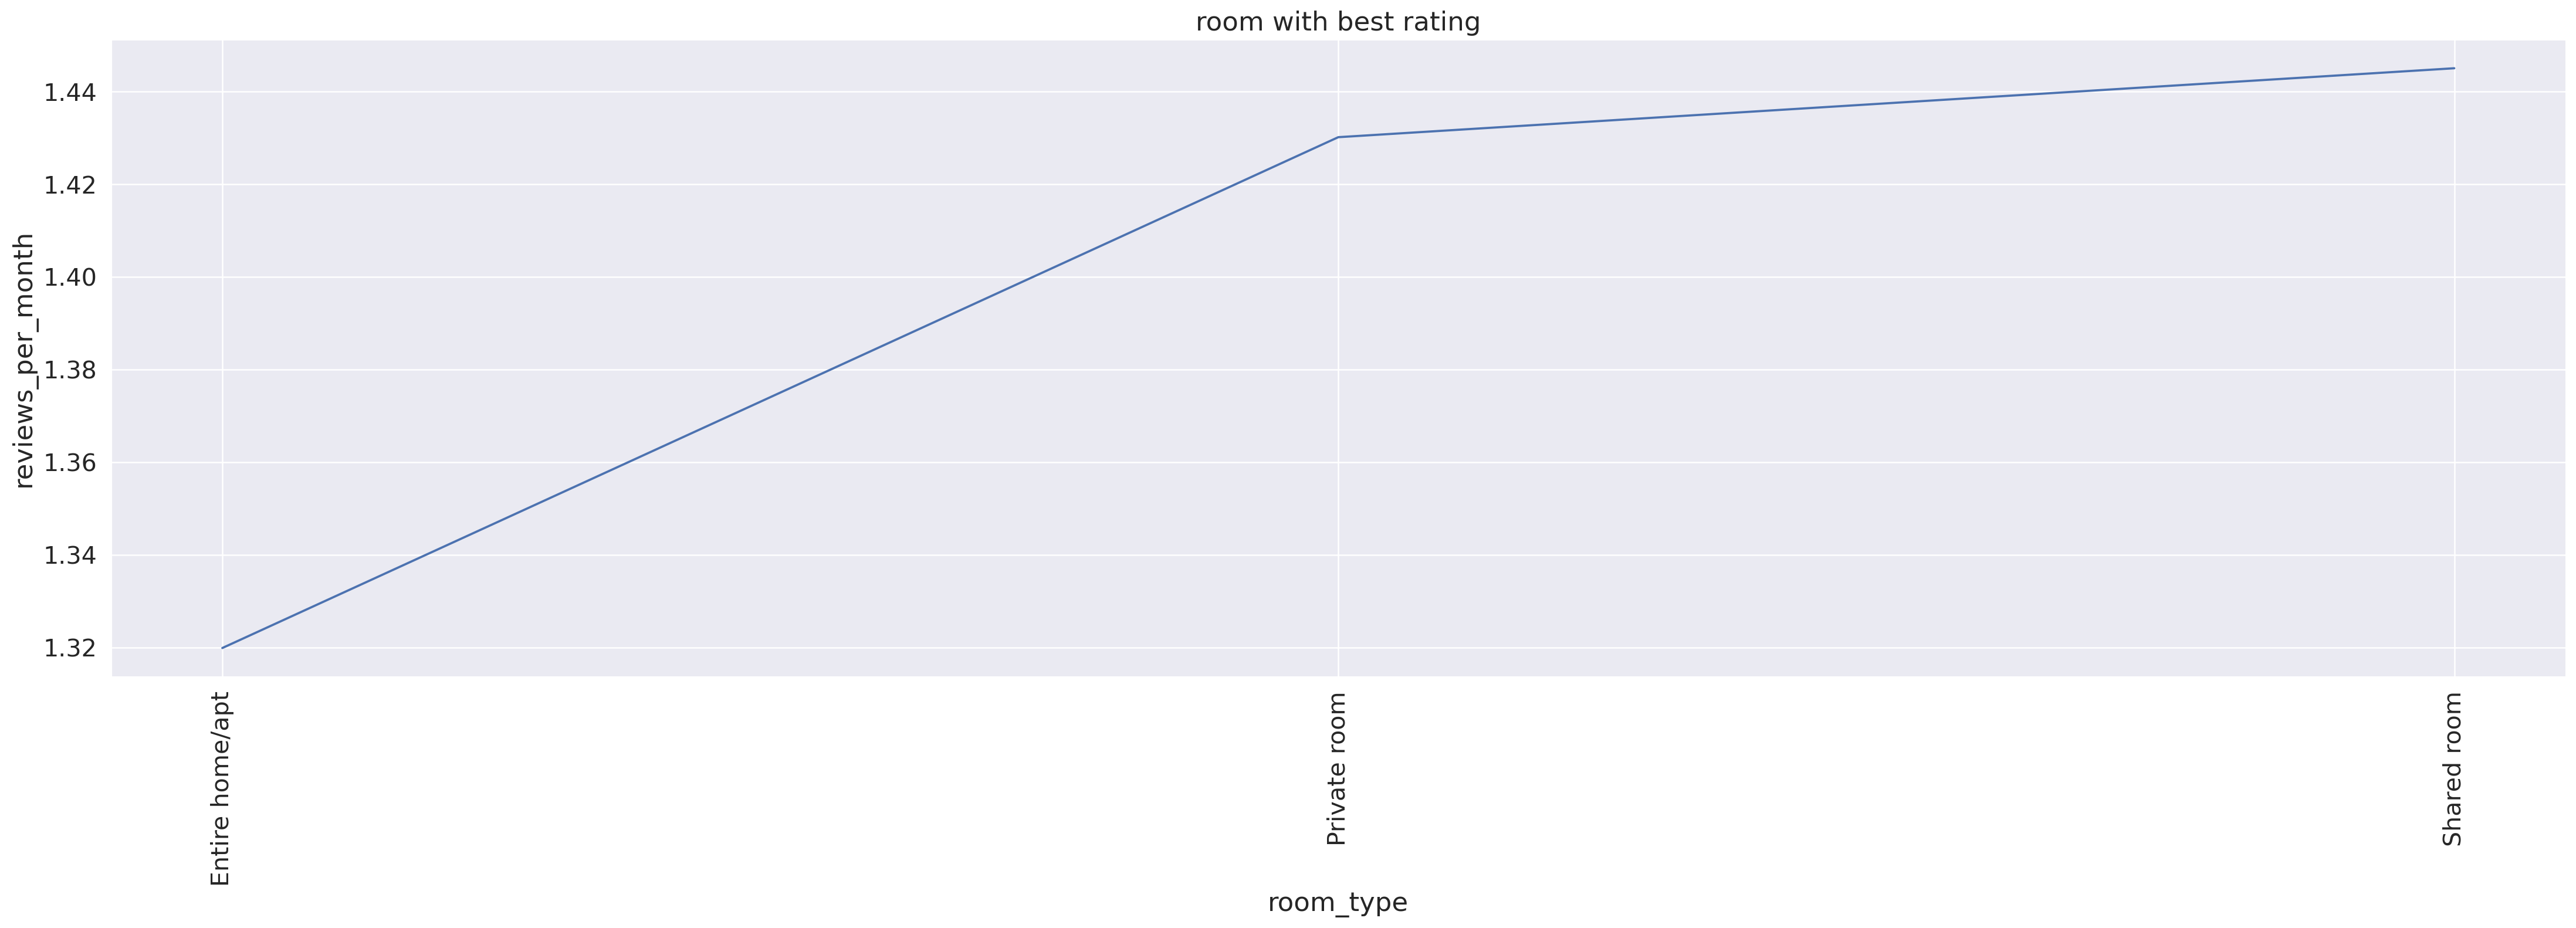

In [ ]:
plt.figure(figsize=(30,8),dpi=180)

plt.title('room with best rating')

#rotating x axis to 90 degree
plt.xticks(rotation=90)

#visualising average of review per month with room type with lineplot
sns.lineplot(y=room_review_per_month_mean.head(10),x=room_review_per_month_mean.index)

**Correlation Matrix:**

This gives the correlation between the price and minimum nights data.
Storing the correlation of numerical data into a variable.

In [ ]:
price_of_room = df['price']
minimum_number_of_nights = df['minimum_nights']

In [ ]:
correlation = price_of_room.corr(minimum_number_of_nights)
correlation

0.04279933414330347

In [ ]:
correlation_matrix = df.corr()

By the below heat map we have 

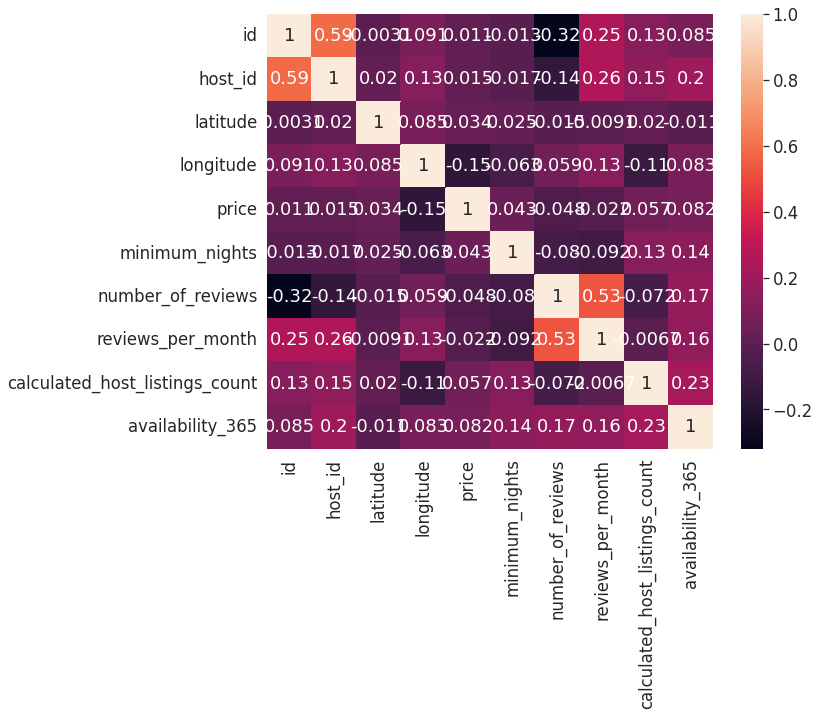

In [ ]:
sns.heatmap(correlation_matrix,annot=True)



*   By this heat map we have conclude that price is positivly correlated with minimum number of nights with the value of 0.042
*   review per month and number of review are highly correlated with a value of 0.53.
*   










**To find the average price of top 10 most reviewed listings in NYC**

In [ ]:
top_reviwed_listings = df.nlargest(10,'number_of_reviews')
top_reviwed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [ ]:
top_reviwed_listings['number_of_reviews'].max()

629

In [ ]:
price_avg = top_reviwed_listings.price.mean()
print(f'average price per night:{price_avg}')

average price per night:65.4


From this output we can observe that the top 10 most reviewed listings on Airbnb NYC has price average of $65

Extract the Day, Month and Year from the last_review column. Create a new columns like Day, Month and Year..

In [ ]:
def day(last_review):
  try:
    return datetime.strptime(last_review,'%Y-%M-%d').day
  except:
    return 0

In [ ]:
df['Day']=df['last_review'].apply(day)

In [ ]:
def month(last_review):
  try:
    return datetime.strptime(last_review, "%Y-%m-%d").month
  except:
    return 0

In [ ]:
df['Month']=df['last_review'].apply(month)

In [ ]:
def year(last_review):
  try:
    return datetime.strptime(last_review,'%Y-%M-%d').year
  except:
    return 0

In [ ]:
df['Year']=df['last_review'].apply(year)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day,Month,Year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,19,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,21,5,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,no review,1.373221,1,365,0,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,5,7,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,19,11,2018




**Year wise types of rooms getting a last review**

Approach:
*   Group by the Year and Types of Rooms
*   Count the Rooms





In [ ]:
year_wise_room = df.groupby(['Year','room_type'])['room_type'].count().unstack()
year_wise_room

room_type,Entire home/apt,Private room,Shared room
Year,,,
0,5077.0,4661.0,314.0
2011,2.0,5.0,NaN
2012,15.0,10.0,NaN
2013,33.0,15.0,NaN
2014,131.0,65.0,3.0
2015,735.0,631.0,27.0
2016,1496.0,1180.0,31.0
2017,1580.0,1561.0,64.0
2018,3074.0,2842.0,134.0


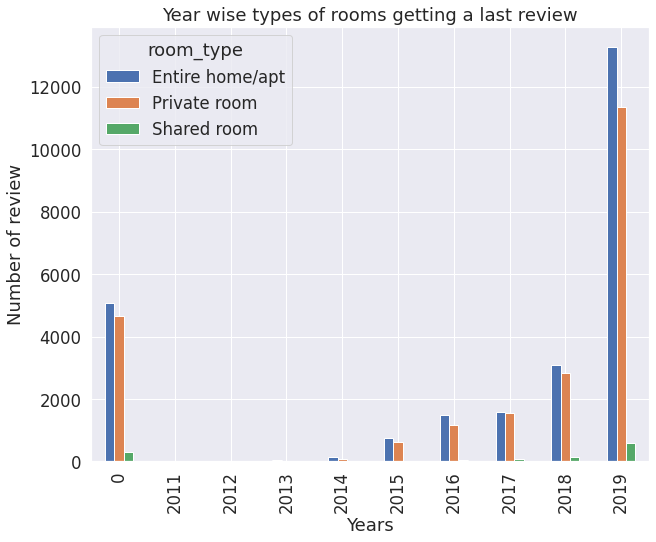

In [ ]:
year_wise_room.plot(kind='bar')

plt.title('Year wise types of rooms getting a last review')
plt.ylabel('Number of review')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (40, 5)



**Find the how many of Neighbourhood group are available 365 days** **bold text**

*   Gruop by Neighbourhood_Group
*   Count the number Neighbourhood_Group avaliable 365 days 



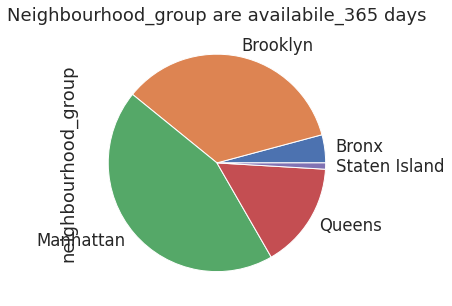

In [ ]:
availability_of_365 = df[df['availability_365']>=365]
df1 = availability_of_365.groupby(['neighbourhood_group'])['neighbourhood_group'].count()

df1.plot(kind='pie')

plt.title('Neighbourhood_group are availabile_365 days')
plt.rcParams['figure.figsize'] = (30, 10)


 How many last reviews of every month(Count last_reviews per month)

1.  Group By Month 
2.  Count the Month





Text(0.5, 0, 'Month')

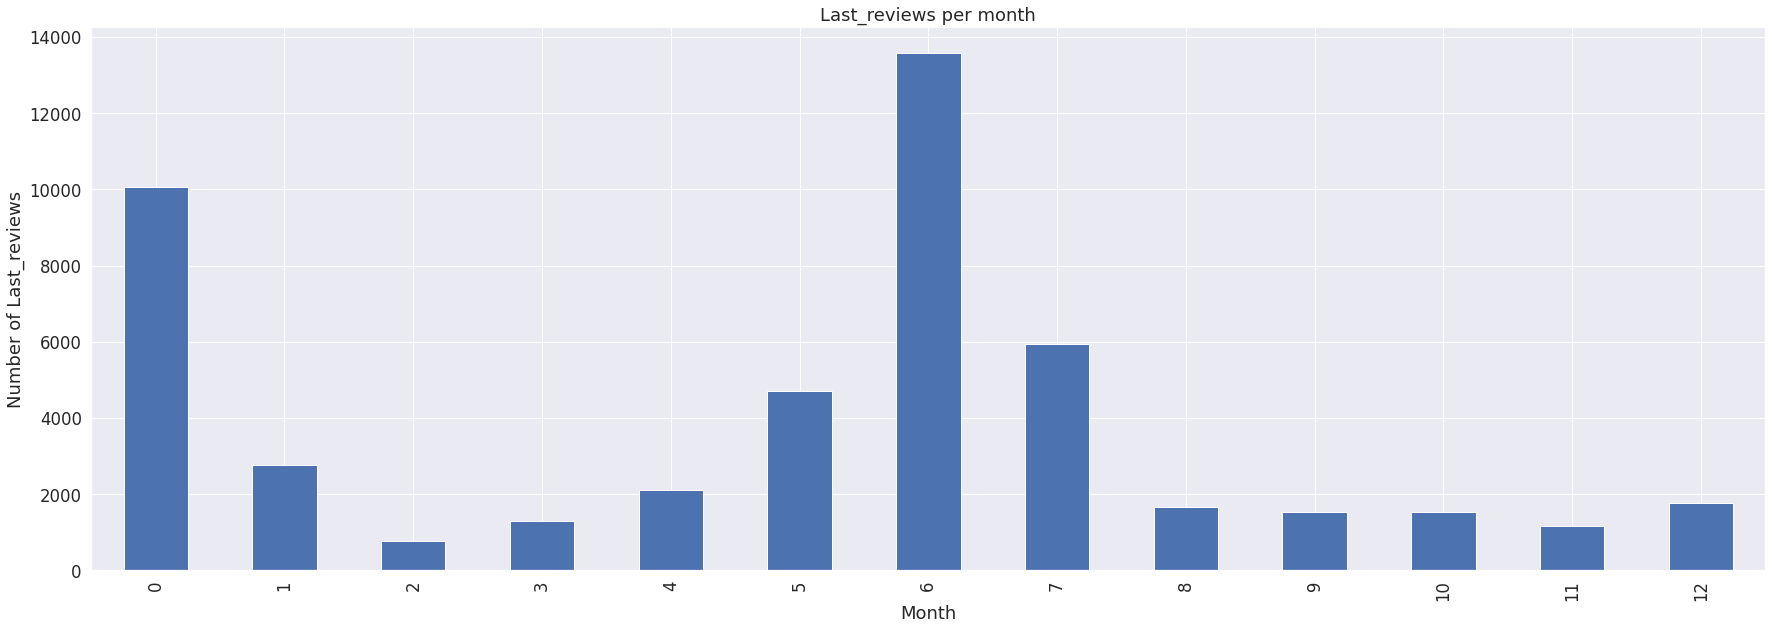

In [ ]:
Month_wise_room = df.groupby(['Month'])['Month'].count()
Month_wise_room.plot(kind='bar')

plt.title('Last_reviews per month')
plt.ylabel('Number of Last_reviews')
plt.xlabel('Month')

##Hotels who have same Neighbourhood


### All available neighbourhood in Data set

In [ ]:
list(df["neighbourhood_group"].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#### Hotels in Brooklyn 

In [ ]:
Brooklyn_hotel= df[df["neighbourhood_group"]=="Brooklyn"]
Brooklyn_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
0,2539,Clean & quiet apt home by the park,John,Brooklyn,1
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,1
6,5121,BlissArtsSpace!,Garon,Brooklyn,45
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",Laurie,Brooklyn,4
15,6848,Only 2 stops to Manhattan studio,Allen & Irina,Brooklyn,2
...,...,...,...,...,...
890,322037,"Luxury Williamsburg, Brooklyn LOFT",James,Brooklyn,2
891,322604,Artist Loft-McCarren Park-Williamsburg-Brookly...,Todd,Brooklyn,2
894,324115,Large Master Bedroom - Williamsburg,Jason,Brooklyn,2
896,324800,Real Williamsburg Artist Loft,Mathias,Brooklyn,3


### Hotels in Manhattan

In [ ]:
Manhattan_hotel= df[df["neighbourhood_group"]=="Manhattan"]
Manhattan_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,10
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,3
7,5178,Large Furnished Room Near B'way,Shunichi,Manhattan,2
...,...,...,...,...,...
893,323706,Elegant Spacious Family Townhouse,Ted And Diane,Manhattan,30
895,324517,Central Park Fifth Av MET Museum,S,Manhattan,1
897,325429,Lovely Upper East Yorkville 1 BDRM,Sara,Manhattan,4
898,326832,Cozy Upper East Side Studio,Nitzan,Manhattan,2


### Hotels in Queens

In [ ]:
Queens_hotel= df[df["neighbourhood_group"]=="Queens"]
Queens_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",Orestes,Queens,3
77,18198,Little King of Queens,Justin,Queens,30
143,32363,Fully Furnished Basement Apartment,Fredah,Queens,2
161,39593,"A room w/ a Manhattan view, longer stay",Myung,Queens,30
181,45910,Beautiful Queens Brownstone! - 5BR,Mark,Queens,8
196,51850,( F) Excellent/Pvt Rm,Jullett,Queens,2
199,53469,cozy studio with parking spot,Mark,Queens,30
200,53470,Clean and convenient 2BR apartment,Mark,Queens,7
201,53477,3 floors of luxury!,Mark,Queens,7
218,57166,Elegant NYC Pad,Vasili,Queens,2


### Hotels in Staten Island





In [ ]:
Staten_Island_hotel= df[df["neighbourhood_group"]=="Staten Island"]
Staten_Island_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
169,42882,New York room with a view,Newyorkroomwithaview,Staten Island,2
249,62452,A SpeciaL!! Private Room in NY,Lissette,Staten Island,2
250,62461,B NYC Staten Alternative...,Lissette,Staten Island,2
251,62787,C Private Room By The Ferry,Lissette,Staten Island,2
256,63320,D Private Che@p Room 2 Explore NYC,Lissette,Staten Island,2
571,214917,New Clean Spacious Bed & Breakfast,Carmel,Staten Island,2
598,225976,Sunny cozy multileveled apartment!,Marina,Staten Island,6
702,258838,"Oceanview,close to Manhattan",Marina,Staten Island,2
703,258876,"Affordable rooms,all transportation",Marina,Staten Island,7
704,259946,"Budget stay, near transportation",Marina,Staten Island,2


### Hotels in Bronx Island





In [ ]:
Bronx_hotel= df[df["neighbourhood_group"]=="Bronx"]
Bronx_hotel.loc[0:900,["id","name","host_name","neighbourhood_group","minimum_nights"]]

,id,name,host_name,neighbourhood_group,minimum_nights
171,44096,Room with a View,Waundell,Bronx,1
207,54626,Cozy bedroom by Yankee Stadium,Waundell,Bronx,1
260,63588,LL3,Carol Gloria,Bronx,2
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,Vie,Bronx,2
309,71812,Condo Apartment with laundry in unit,Thai,Bronx,30
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,"Dee, Dre & Mama Shelley",Bronx,1
484,169306,Affordable & Cozy,Vanessa,Bronx,4
510,182177,A PRIVATE FLAT / APARTMENT- $SPECIAL$,Christian & Carla,Bronx,2
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,Lori,Bronx,3
610,230854,Zen Yankee Stadium Pad 5 Minutes To Manhattan!,Lori,Bronx,5


In [ ]:
neighbourhood= df['neighbourhood_group'].value_counts()


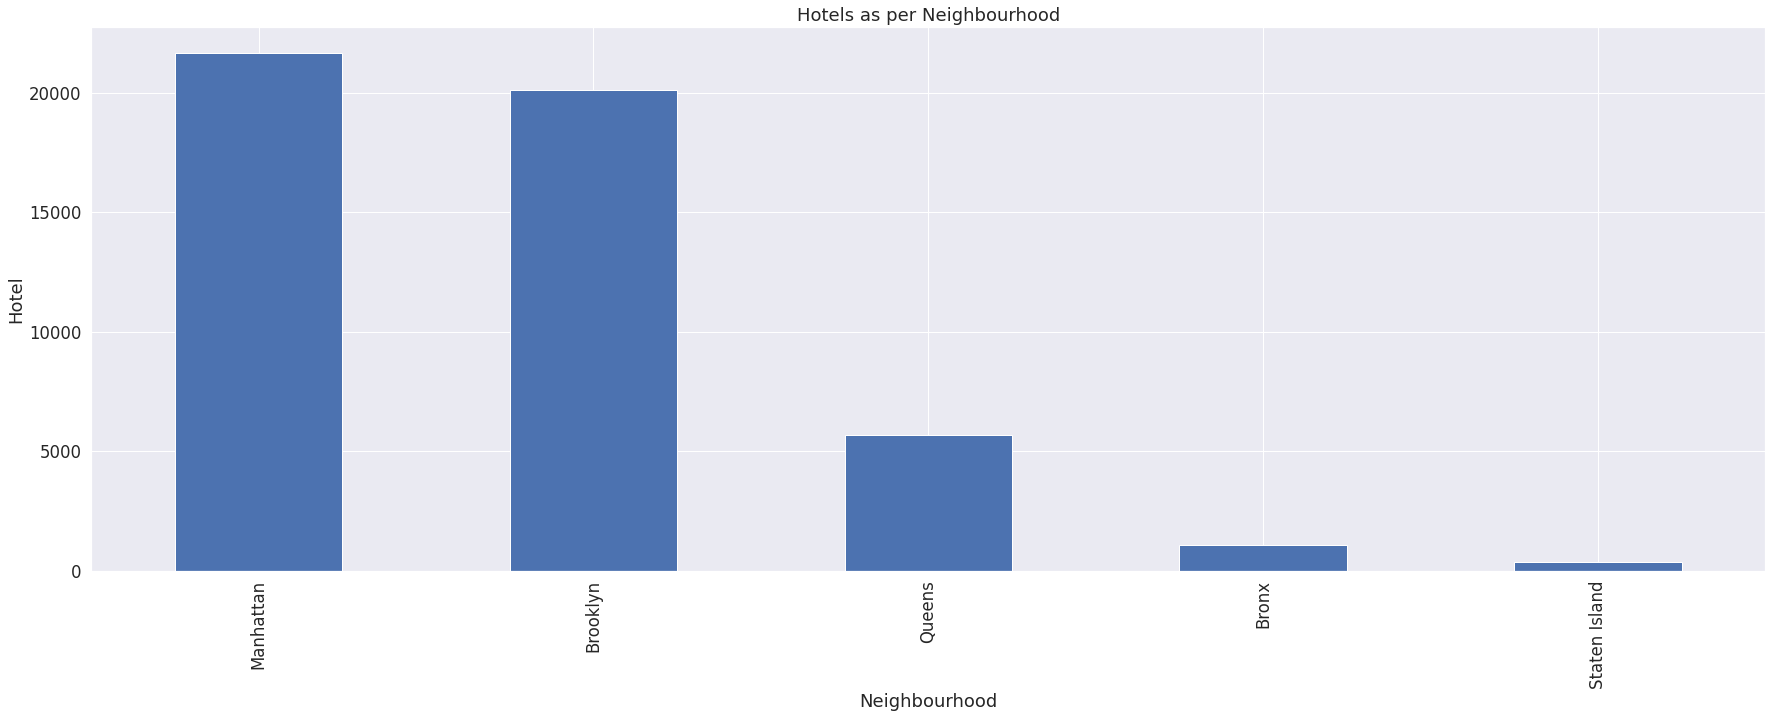

In [ ]:
 neighbourhood.plot(kind='bar')

plt.title('Hotels as per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Hotel')
plt.rcParams['figure.figsize']=(20,4)

### Hotels which provide only private room.

In [ ]:
private_room_hotel=df[df["room_type"]=="Private room"]
private_room_hotel

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day,Month,Year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,19,10,2018
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,no review,1.373221,1,365,0,0,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.400000,1,0,5,10,2017
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,24,6,2019
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.990000,1,0,21,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,no review,1.373221,1,31,0,0,0
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,no review,1.373221,2,163,0,0,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,no review,1.373221,2,9,0,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,no review,1.373221,2,36,0,0,0


In [ ]:
Private_room=private_room_hotel.loc[0:48894,["neighbourhood_group"]].value_counts()

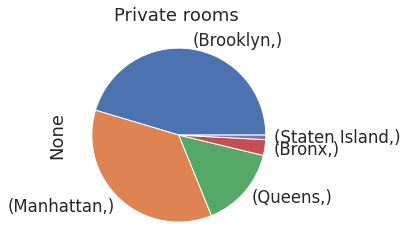

In [ ]:
Private_room.plot(kind='pie')

plt.title('Private rooms ')

plt.rcParams['figure.figsize']=(50,4)

In [ ]:
Types_of_rooms= df['room_type'].value_counts()

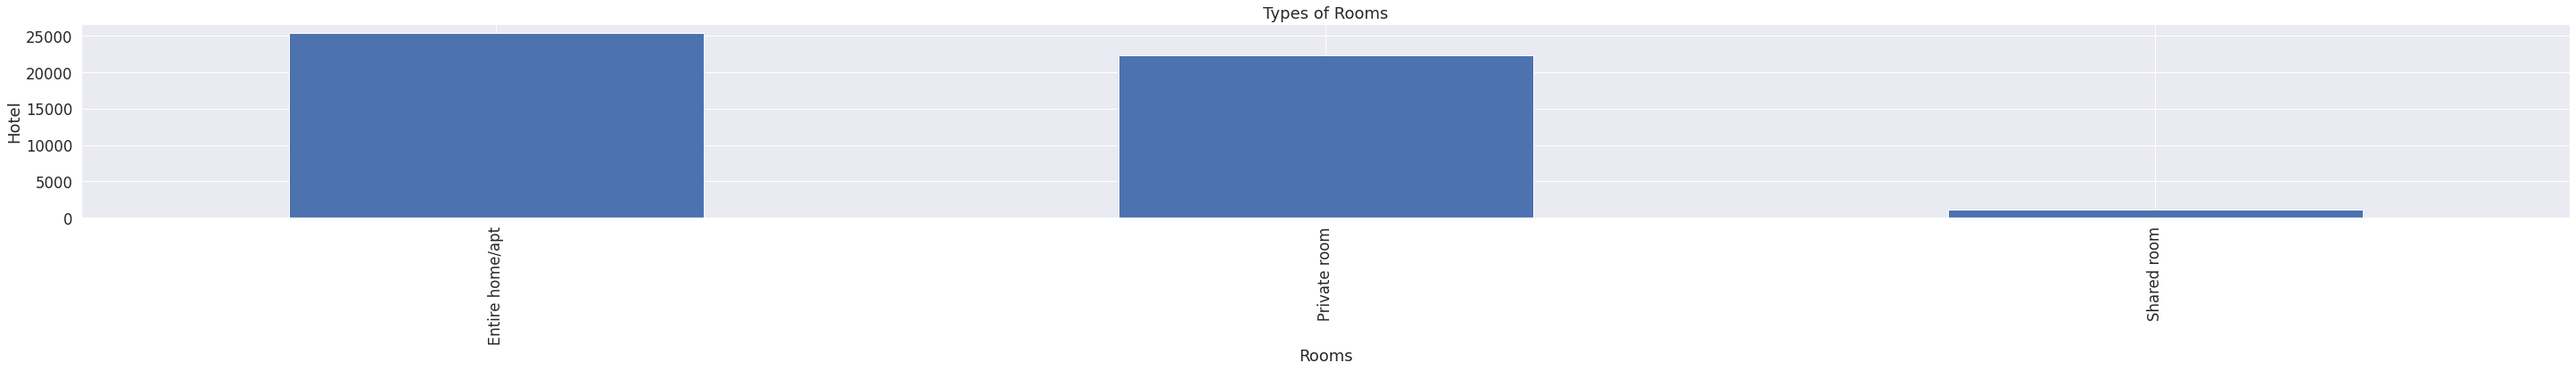

In [ ]:
Types_of_rooms.plot(kind='bar')

plt.title('Types of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Hotel')
plt.rcParams['figure.figsize']=(20,4)

##Minimum Nights

In [ ]:
Minimum_night=df['minimum_nights'].value_counts()

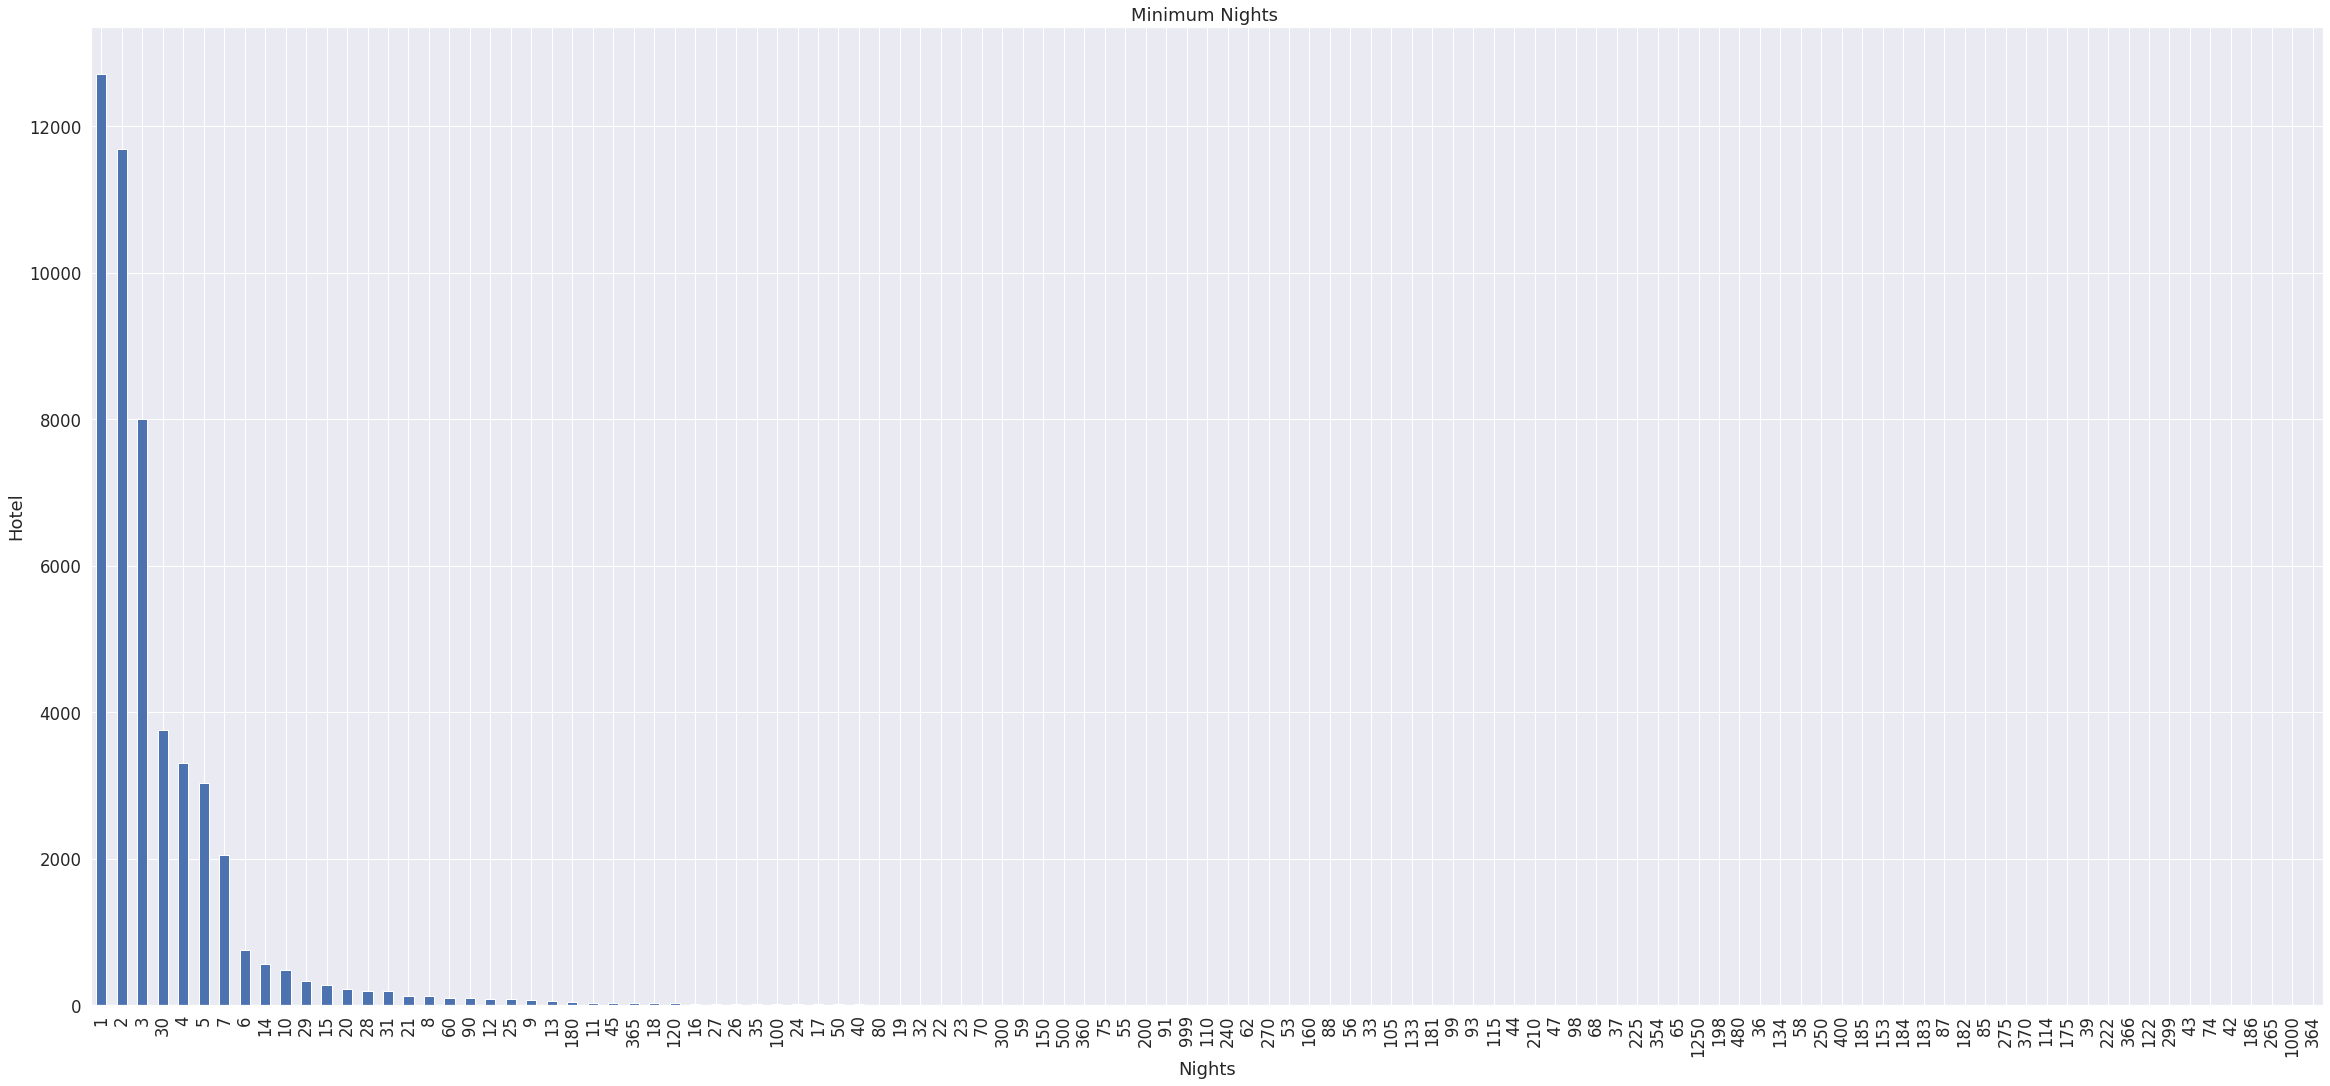

In [ ]:
Minimum_night.plot(kind='bar')

plt.title('Minimum Nights ')
plt.xlabel('Nights')
plt.ylabel('Hotel')
plt.rcParams['figure.figsize']=(40,9)

###Hotels with minimum night two or more.

In [ ]:
hotel_for_2_days= df[df["minimum_nights"]>=2]

In [ ]:
hotel_for_2_days

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day,Month,Year
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,no review,1.373221,1,365,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,19,11,2018
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,22,6,2019
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.400000,1,0,5,10,2017
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,24,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,no review,1.373221,1,31,0,0,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,no review,1.373221,2,9,0,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,no review,1.373221,2,36,0,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,no review,1.373221,1,27,0,0,0


### Rooms which cost less than or equal to 100.

In [ ]:
cost_less_than_or_equal_to_100=private_room_hotel[private_room_hotel["price"] <=100]

In [ ]:
cost_less_than_or_equal_to_100

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day,Month,Year
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.400000,1,0,5,10,2017
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,24,6,2019
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.990000,1,0,21,7,2017
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.500000,1,39,23,6,2019
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.340000,3,314,24,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,no review,1.373221,2,353,0,0,0
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,no review,1.373221,2,163,0,0,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,no review,1.373221,2,9,0,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,no review,1.373221,2,36,0,0,0


###Median Price per Neighbourhood Group :

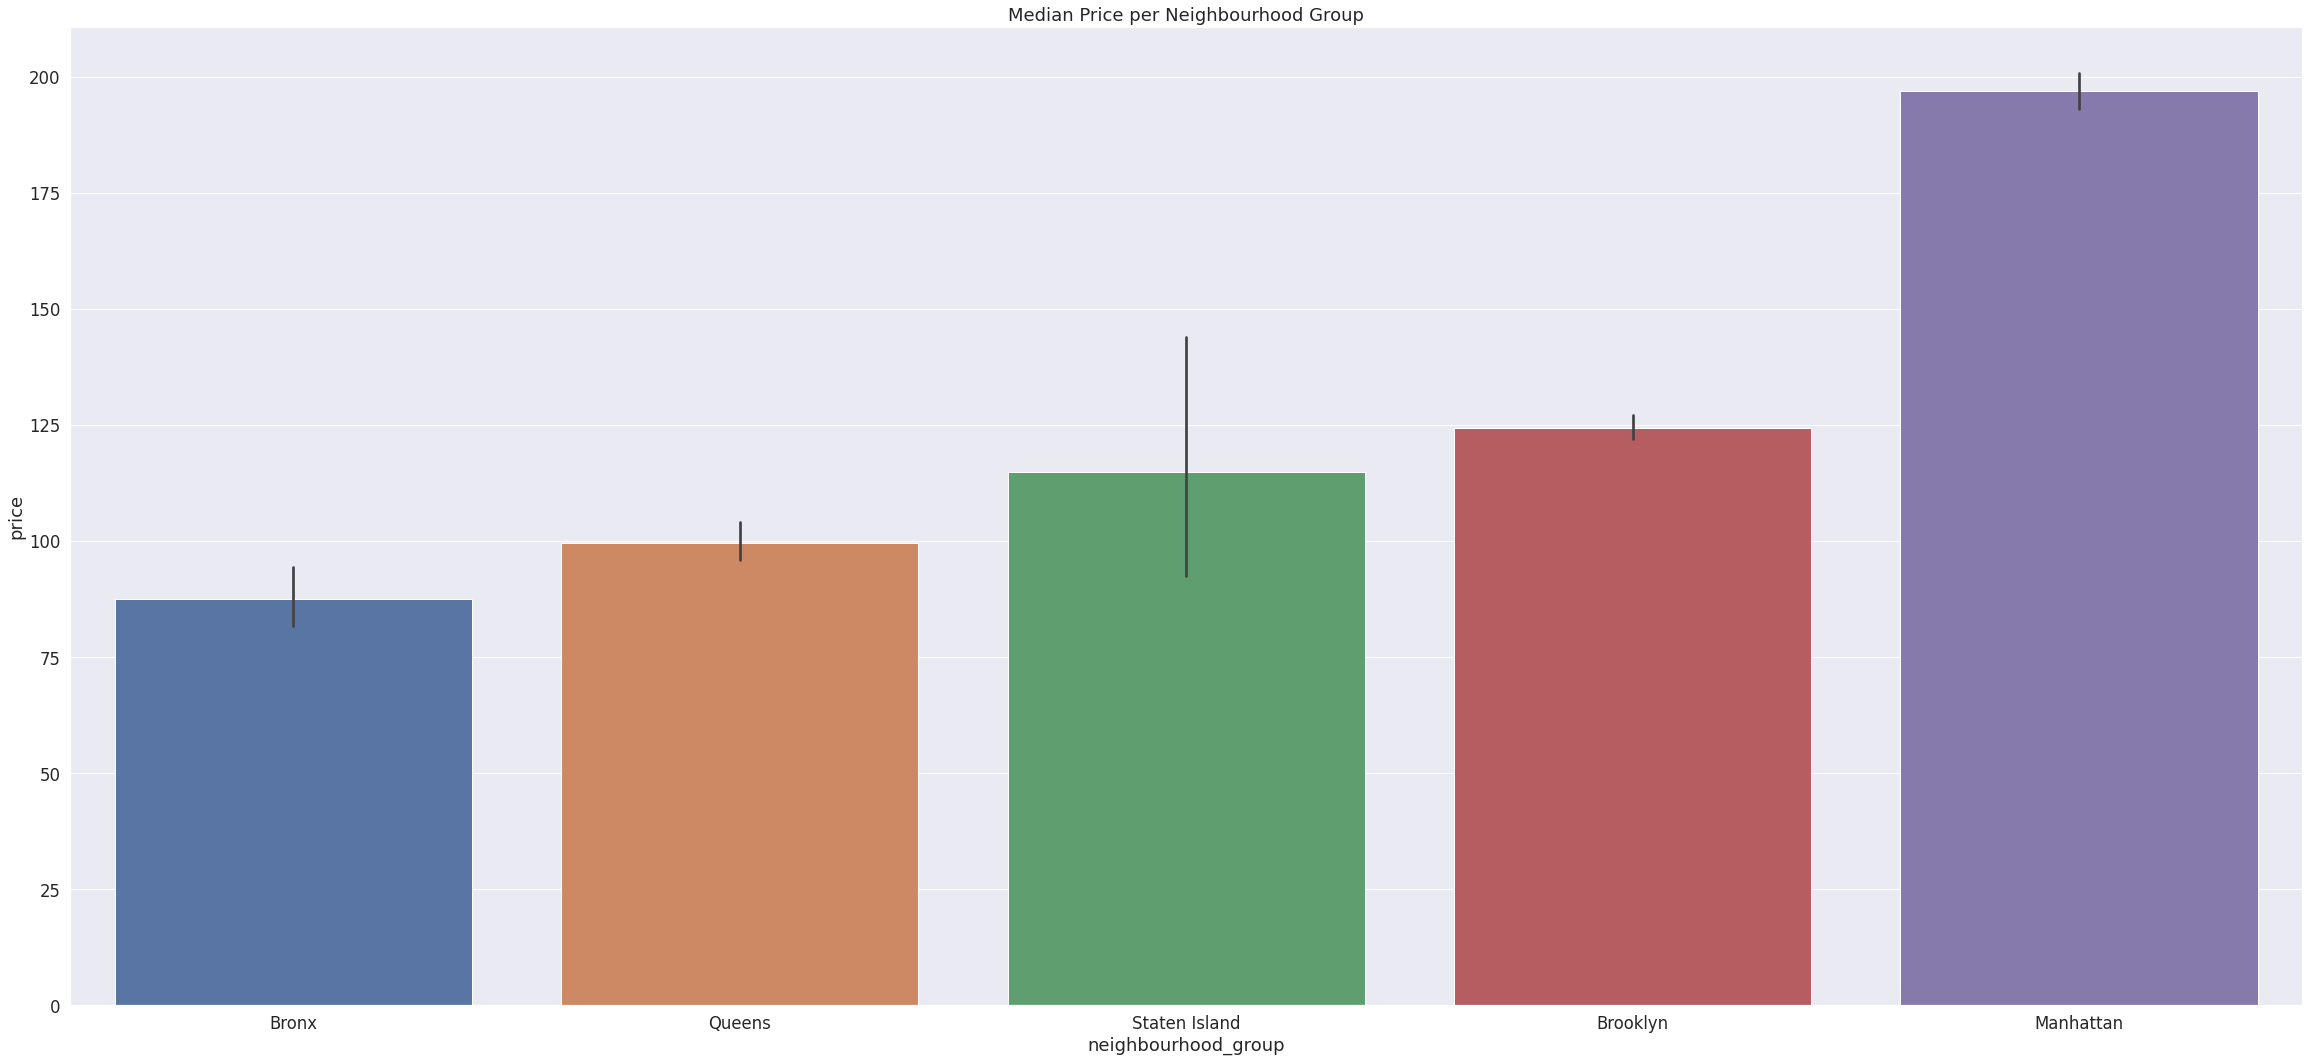

In [ ]:
title = 'Median Price per Neighbourhood Group'
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group'])
plt.title(title)
plt.ioff()

### Neighbourhood group location and Room type per Neighbourhood Group:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


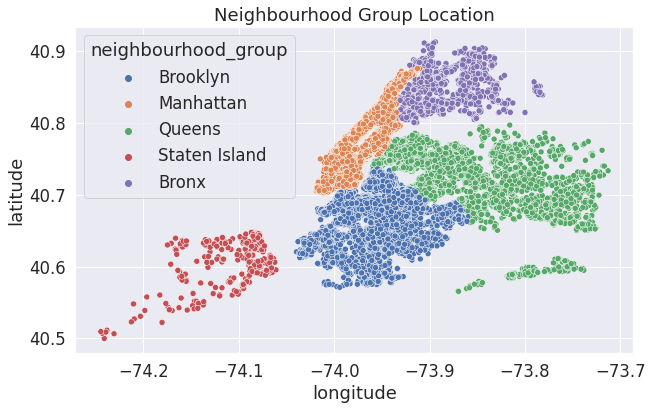

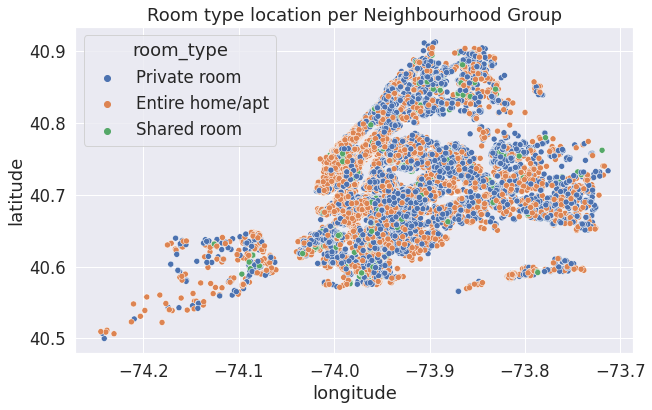

In [ ]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type).set_title(title)
plt.ioff()

In [ ]:
#avg price of airbnb based on number of reviews
num_reviews_avgPrice =pd.DataFrame(df.groupby('number_of_reviews')["price"].mean())
num_reviews_avgPrice

,price
number_of_reviews,
0,192.919021
1,149.422387
2,148.238961
3,144.200000
4,144.995988
...,...
576,47.000000
594,49.000000
597,49.000000


In [ ]:
num_reviews_avgPrice.rename(columns = {'price':'average_price'}, inplace = True)

In [ ]:
num_reviews_avgPrice.tail(15)

,average_price
number_of_reviews,
458,60.0
459,45.0
466,65.0
467,120.0
474,55.0
480,60.0
488,160.0
510,48.0
540,99.0


In [ ]:
num_reviews_avgPrice_top15=num_reviews_avgPrice.tail(15)

Text(0, 0.5, 'Average_price')

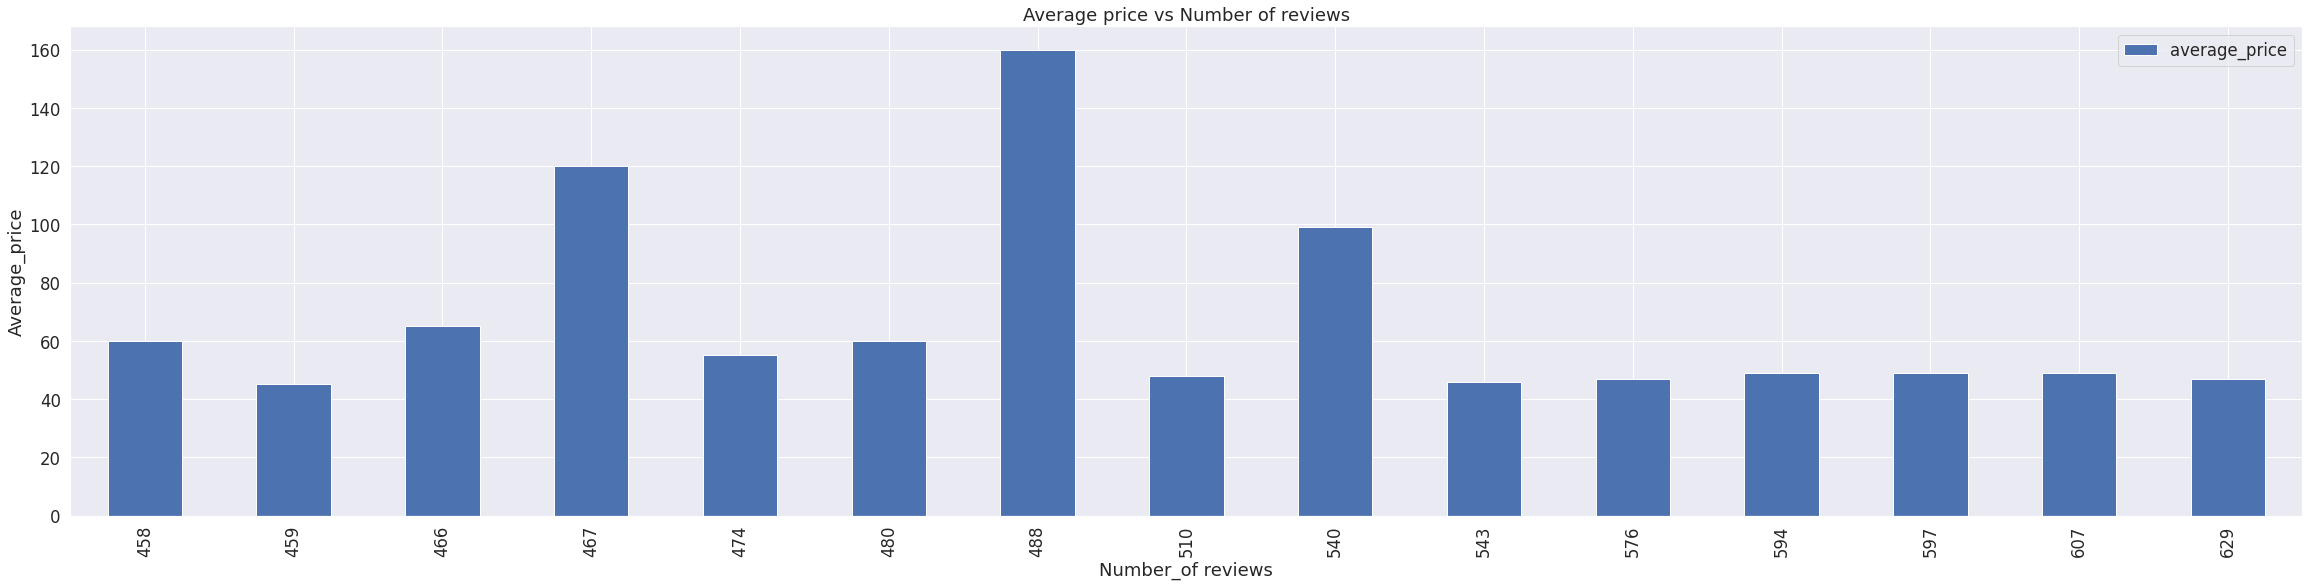

In [ ]:
#Number of reviews vs avg price bar
num_reviews_avgPrice_top15.plot(kind='bar')
plt.title('Average price vs Number of reviews')
plt.xlabel('Number_of reviews')
plt.ylabel('Average_price')
#plt.rcParams['figure.figsize']=(10,5)

In [ ]:
#neighbourhood group vs number of reviews
neighbourhoodGroup_numRev=pd.DataFrame(df.groupby('neighbourhood_group')['number_of_reviews'].mean())
neighbourhoodGroup_numRev

,number_of_reviews
neighbourhood_group,
Bronx,26.004583
Brooklyn,24.202845
Manhattan,20.985596
Queens,27.700318
Staten Island,30.941019


Text(0, 0.5, 'Number_of_reviews')

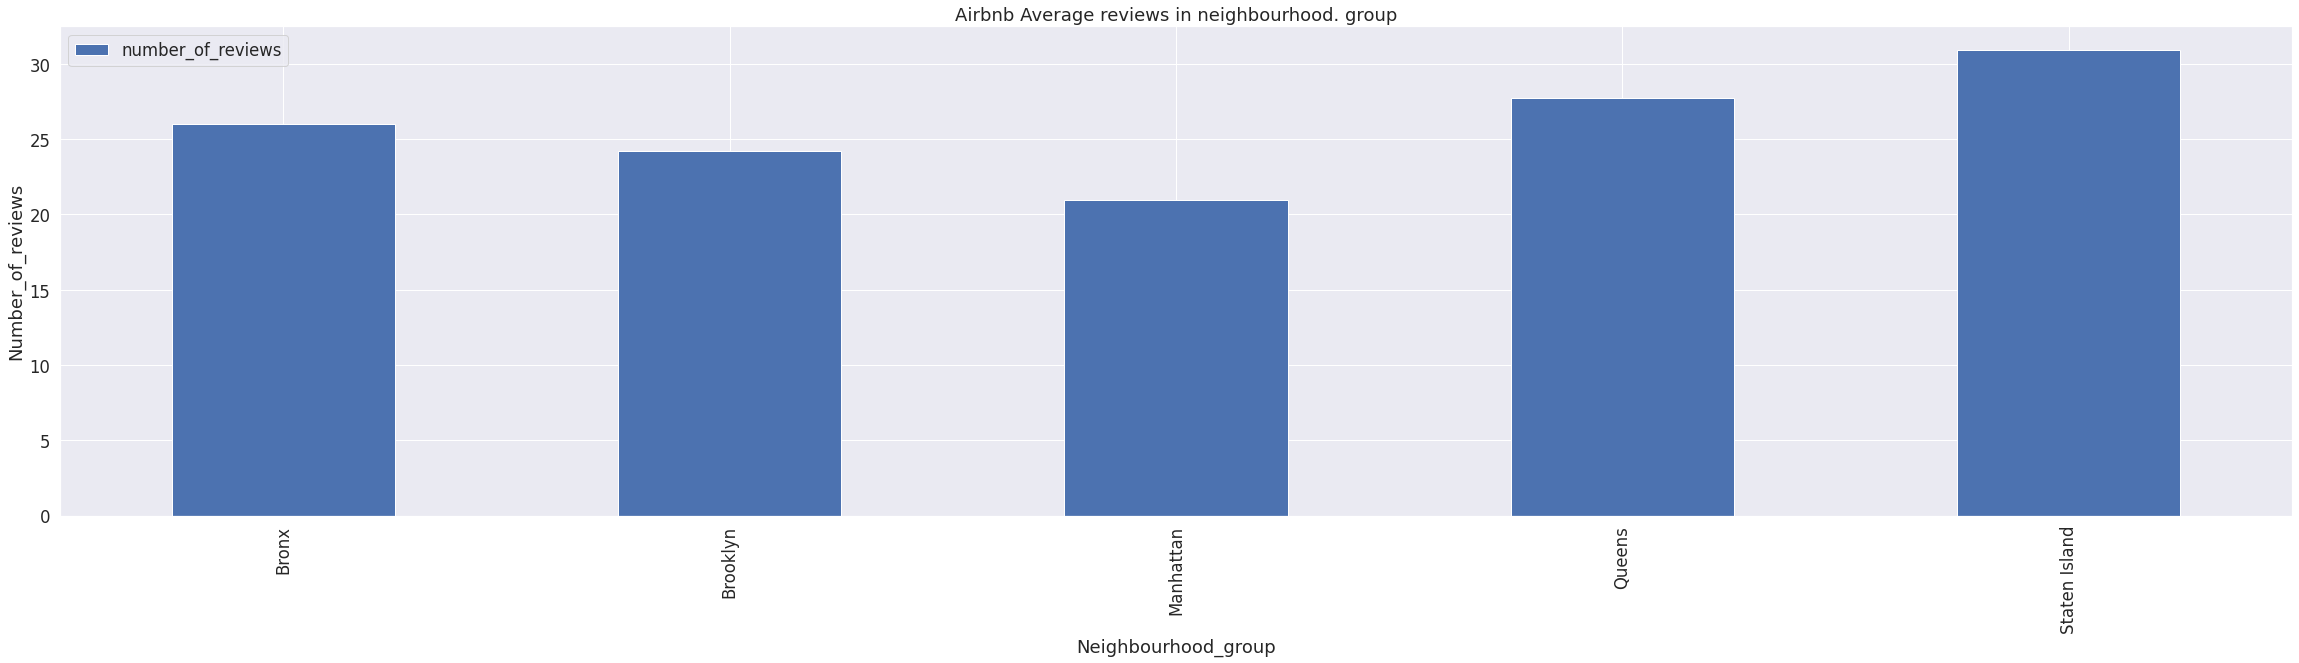

In [ ]:
#barchart Average reviews of AirBnb in neighbourhood_group
neighbourhoodGroup_numRev.plot(kind='bar')
plt.title('Airbnb Average reviews in neighbourhood. group')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Number_of_reviews')

In [ ]:
#Average reviews of AirBnb in different neighbourhood 
neighbourhood_numRev = pd.DataFrame(df.groupby("neighbourhood")['number_of_reviews'].mean())
neighbourhood_numRev

,number_of_reviews
neighbourhood,
Allerton,42.928571
Arden Heights,7.750000
Arrochar,14.619048
Arverne,29.259740
Astoria,21.455556
...,...
Windsor Terrace,27.541401
Woodhaven,31.727273
Woodlawn,44.000000


In [ ]:
neighbourhood_numRev_top15=neighbourhood_numRev.sort_values(by='number_of_reviews', ascending=False).head(15)

Text(0, 0.5, 'Number_of_reviews')

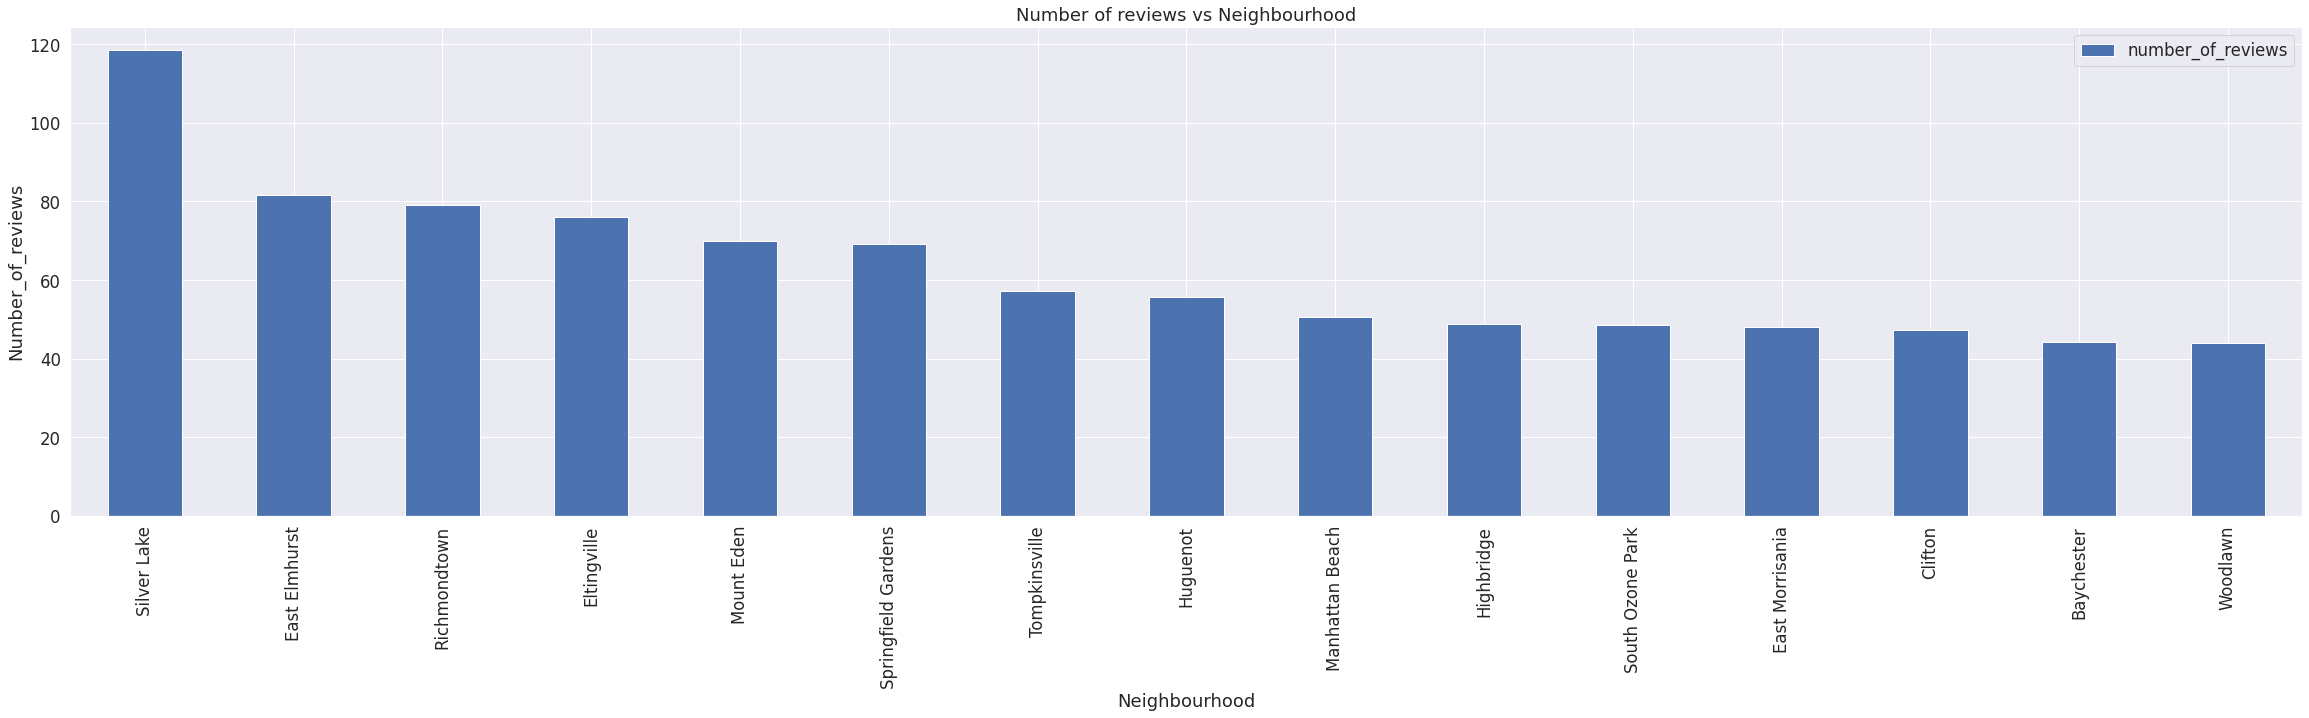

In [ ]:
#barchart Number of reviews vs neighbourhood
neighbourhood_numRev_top15.plot(kind='bar')
plt.title('Number of reviews vs Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number_of_reviews')

In [ ]:
df_price_upto1000=df[df['price']<1000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


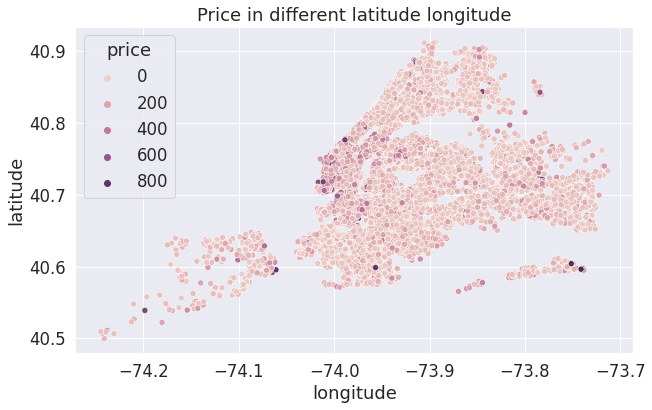

In [ ]:
#Price in different latitude longitude
title='Price in different latitude longitude'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df_price_upto1000.price).set_title(title)
plt.ioff()

In [ ]:
df_num_of_reviews_upto200=df[df['number_of_reviews']<200]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


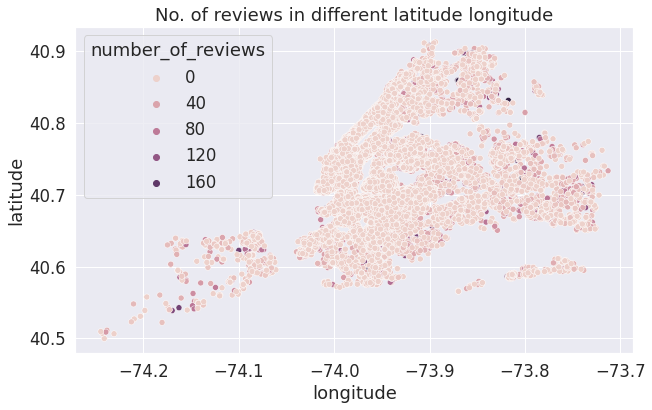

In [ ]:
#Number of reviews in different latitude longitude
title='No. of reviews in different latitude longitude'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df_num_of_reviews_upto200.number_of_reviews).set_title(title)
plt.ioff()